2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs/given/plot_0_with_border.png
2024-12-23 11:36:22,421 - my_logger - INFO - Image with border: test_figs

Image saved at: test_figs/given/plot_0_with_border.png


2024-12-23 11:36:39,234 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 300]}, {'chart_id': 2, 'top_left': [50, 320], 'bottom_right': [850, 550]}]
2024-12-23 11:36:39,234 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 300]}, {'chart_id': 2, 'top_left': [50, 320], 'bottom_right': [850, 550]}]
2024-12-23 11:36:39,234 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 300]}, {'chart_id': 2, 'top_left': [50, 320], 'bottom_right': [850, 550]}]
2024-12-23 11:36:39,234 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 300]}, {'chart_id': 2, 'top_left': [50, 320], 'bottom_right': [850, 550]}]
2024-12-23 11:36:39,234 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 300]}, {'chart_id': 2, 'top_left': [50, 320], 'bottom_right': [850, 550]}]
2024-12-23 11:36:39,

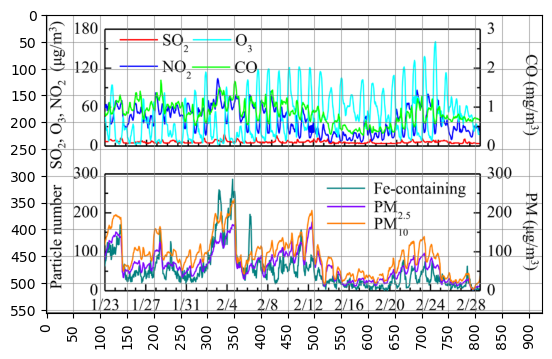

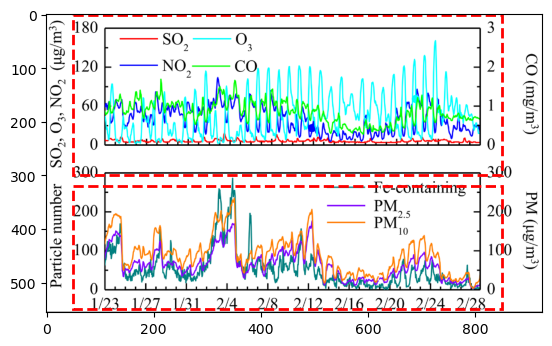

In [63]:
import logging
from dataclasses import asdict
import json
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd
import numpy as np
from openai import OpenAI

from utilities import local_image_to_data_url
from configs.openai_config import openai_api
from prompts import PromptManager
from agent_tools.crop_img import crop_image
from agent_tools.img_outer_border import get_image_with_border
from agent_tools.hough_axis import detect_axis_bounding_box
from agent_tools.plot_extract import extract_and_save_plot_points
from agent_process import *

IMAGE_PATH = "test_figs/given/plot_0.png"
DEBUG = True
CROP_OUTPUT_DIR = "output/cropped"
CROP_OUTPUT_SUFFIX = "{}_cropped"

client = OpenAI(**asdict(openai_api))
data_url = local_image_to_data_url(IMAGE_PATH)
prompt_manager = PromptManager()


def setup_logger(name="my_logger", log_file=None, level=logging.INFO):
    """
    Set up a logger that logs messages at the INFO level and higher.

    Parameters:
        name (str): Name of the logger (default is 'my_logger').
        log_file (str): If provided, log messages will be written to this file.
        level (int): The logging level (default is logging.INFO).

    Returns:
        logging.Logger: The configured logger.
    """
    # Create a logger
    logger = logging.getLogger(name)

    # Set the logging level
    logger.setLevel(level)

    # Create a formatter for the log messages
    formatter = logging.Formatter(
        "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
    )

    # Create a console handler to output logs to the console
    console_handler = logging.StreamHandler()
    console_handler.setFormatter(formatter)
    logger.addHandler(console_handler)

    # If a log file is provided, create a file handler to log to a file
    if log_file:
        file_handler = logging.FileHandler(log_file)
        file_handler.setFormatter(formatter)
        logger.addHandler(file_handler)

    return logger


# print(get_rough_crop(client, data_url, prompt_manager))
logger = setup_logger()

image_with_border = get_image_with_border(
    IMAGE_PATH,
    tick_pixel=50,
    output_dir="test_figs/given",
    output_suffix="with_border",
)
logger.info("Image with border: %s", image_with_border)
border_data_url = local_image_to_data_url(image_with_border)
box_message = get_rough_crop(client, border_data_url, prompt_manager)
box_list = box_message.split("```")[1]
if box_list.startswith("json"):
    box_list = box_list[4:]
box_list = box_list.strip()
try:
    box_list = json.loads(box_list)
    logger.info("Bounding boxes: %s", box_list)
except json.JSONDecodeError:
    logger.error("Error decoding JSON: %s", box_list)
    sys.exit(1)

if DEBUG:
    # plot image with bounding boxes
    # Create figure and axes
    fig, ax = plt.subplots()
    # Display the image
    img = Image.open(IMAGE_PATH)
    ax.imshow(np.array(img))
    # Create a Rectangle patch
    for box in box_list:
        top_left = box["top_left"]
        bottom_right = box["bottom_right"]
        rect = patches.Rectangle(
            top_left,

            bottom_right[0] - top_left[0],
            bottom_right[1] - top_left[1],
            linewidth=2,
            edgecolor="r",
            facecolor="none",
            linestyle="--",
        )
        # draw rectangle with dashed line
        ax.add_patch(rect)
    plt.show()
    

2024-12-12 19:13:00,162 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 260]}, {'chart_id': 2, 'top_left': [50, 260], 'bottom_right': [850, 550]}]
2024-12-12 19:13:00,162 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 260]}, {'chart_id': 2, 'top_left': [50, 260], 'bottom_right': [850, 550]}]
2024-12-12 19:13:00,162 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 260]}, {'chart_id': 2, 'top_left': [50, 260], 'bottom_right': [850, 550]}]
2024-12-12 19:13:00,162 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 260]}, {'chart_id': 2, 'top_left': [50, 260], 'bottom_right': [850, 550]}]
2024-12-12 19:13:00,162 - my_logger - INFO - Bounding boxes: [{'chart_id': 1, 'top_left': [50, 0], 'bottom_right': [850, 260]}, {'chart_id': 2, 'top_left': [50, 260], 'bottom_right': [850, 550]}]
2024-12-12 19:13:00,

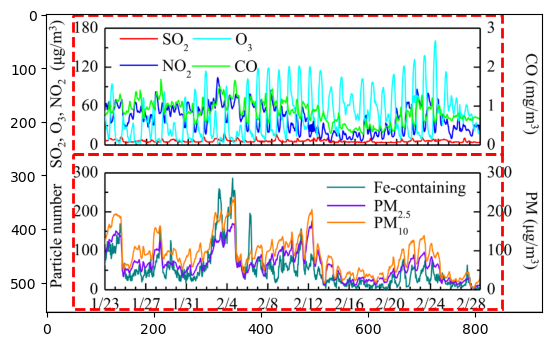

In [17]:


box_message = box_refine(client, border_data_url, prompt_manager, box_list)
box_list = box_message.split("```")[1]
if box_list.startswith("json"):
    box_list = box_list[4:]
box_list = box_list.strip()
try:
    box_list = json.loads(box_list)
    logger.info("Bounding boxes: %s", box_list)
except json.JSONDecodeError:
    logger.error("Error decoding JSON: %s", box_list)
    sys.exit(1)
logger.info("Bounding boxes after refinement: %s", box_list)
if DEBUG:
    # plot image with bounding boxes
    # Create figure and axes
    fig, ax = plt.subplots()
    # Display the image
    img = Image.open(IMAGE_PATH)
    ax.imshow(np.array(img))
    # Create a Rectangle patch
    for box in box_list:
        top_left = box["top_left"]
        bottom_right = box["bottom_right"]
        rect = patches.Rectangle(
            top_left,
            bottom_right[0] - top_left[0],
            bottom_right[1] - top_left[1],
            linewidth=2,
            edgecolor="r",
            facecolor="none",
            linestyle="--",
        )
        # draw rectangle with dashed line
        ax.add_patch(rect)
    plt.show()

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
print(prompt_manager.extract_info_prompt)


    I will provide you with a JSON containing refined bounding box coordinates for multiple sub-charts within an image. Your task is to analyze each sub-chart and extract the following details for each one:

Y-Axis Information:

Label: The text label of the y-axis.
Max: The maximum value on the y-axis.
Min: The minimum value on the y-axis.
Ticks: A list of all tick values on the y-axis (if present).
X-Axis Information:

Label: The text label of the x-axis.
Max: The maximum value on the x-axis.
Min: The minimum value on the x-axis.
Ticks: A list of all tick values on the x-axis (if present).
Sub-Chart Title: The title of the sub-chart (if available).

Plot Information (for sub-charts containing multiple plots):

A list of all plot names and their corresponding colors as specified in the legend. Each entry should include:
Plot name: The name of the plot (as listed in the legend).
Color: The color associated with the plot in the legend.
Y Axis Max: The maximum value on the y-axis for the

In [55]:
from pprint import pprint
import extra_prompt
import importlib
importlib.reload(extra_prompt)
prompt_manager = PromptManager()

box_info_list = extract_info(client, data_url, box_list, prompt_manager)
# TODO uncapsulate json extraction
box_info_list = box_info_list.split("```")[1]
if box_info_list.startswith("json"):
    box_info_list = box_info_list[4:]
box_info_list = box_info_list.strip()
try:
    box_info_list = json.loads(box_info_list)
except json.JSONDecodeError:
    logger.error("Error decoding JSON: %s", box_info_list)
    sys.exit(1)
# logger.info("Extracted information: %s", box_info_list)
pprint("Extracted information:")
pprint(box_info_list)

'Extracted information:'
[{'bottom_right': [850, 260],
  'chart_id': 1,
  'plots': [{'color': 'red', 'name': 'SO₂'},
            {'color': 'cyan', 'name': 'O₃'},
            {'color': 'blue', 'name': 'NO₂'},
            {'color': 'green', 'name': 'CO'}],
  'title': None,
  'top_left': [50, 0],
  'x_axis_label': None,
  'x_axis_max': None,
  'x_axis_min': None,
  'x_axis_ticks': None,
  'y_axis_label': 'SO₂, O₃, NO₂ (µg/m³)',
  'y_axis_max': 180,
  'y_axis_min': 0,
  'y_axis_ticks': [0, 60, 120, 180]},
 {'bottom_right': [850, 550],
  'chart_id': 2,
  'plots': [{'color': 'teal', 'name': 'Fe-containing'},
            {'color': 'purple', 'name': 'PM₂.₅'},
            {'color': 'orange', 'name': 'PM₁₀'}],
  'title': None,
  'top_left': [50, 260],
  'x_axis_label': None,
  'x_axis_max': None,
  'x_axis_min': None,
  'x_axis_ticks': ['1/23',
                   '1/27',
                   '1/31',
                   '2/4',
                   '2/8',
                   '2/12',
                   '

2024-12-12 20:04:04,833 - my_logger - INFO - Cropped images: ['output/cropped/plot_01_cropped.png', 'output/cropped/plot_02_cropped.png']
2024-12-12 20:04:04,833 - my_logger - INFO - Cropped images: ['output/cropped/plot_01_cropped.png', 'output/cropped/plot_02_cropped.png']
2024-12-12 20:04:04,833 - my_logger - INFO - Cropped images: ['output/cropped/plot_01_cropped.png', 'output/cropped/plot_02_cropped.png']
2024-12-12 20:04:04,833 - my_logger - INFO - Cropped images: ['output/cropped/plot_01_cropped.png', 'output/cropped/plot_02_cropped.png']
2024-12-12 20:04:04,833 - my_logger - INFO - Cropped images: ['output/cropped/plot_01_cropped.png', 'output/cropped/plot_02_cropped.png']
2024-12-12 20:04:04,833 - my_logger - INFO - Cropped images: ['output/cropped/plot_01_cropped.png', 'output/cropped/plot_02_cropped.png']
2024-12-12 20:04:04,833 - my_logger - INFO - Cropped images: ['output/cropped/plot_01_cropped.png', 'output/cropped/plot_02_cropped.png']


Cropped image saved to output/cropped/plot_01_cropped.png
Cropped image saved to output/cropped/plot_02_cropped.png
Bounding box coordinates saved to output/borderline/plot_01_cropped_bounding_box.csv


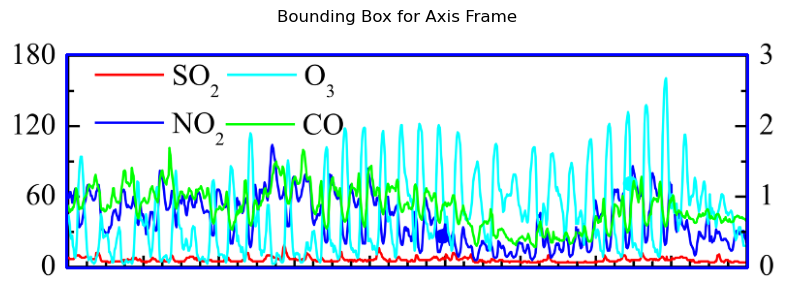

2024-12-12 20:04:04,901 - my_logger - INFO - Bounding box coordinates: (58, 25), (761, 245)
2024-12-12 20:04:04,901 - my_logger - INFO - Bounding box coordinates: (58, 25), (761, 245)
2024-12-12 20:04:04,901 - my_logger - INFO - Bounding box coordinates: (58, 25), (761, 245)
2024-12-12 20:04:04,901 - my_logger - INFO - Bounding box coordinates: (58, 25), (761, 245)
2024-12-12 20:04:04,901 - my_logger - INFO - Bounding box coordinates: (58, 25), (761, 245)
2024-12-12 20:04:04,901 - my_logger - INFO - Bounding box coordinates: (58, 25), (761, 245)
2024-12-12 20:04:04,901 - my_logger - INFO - Bounding box coordinates: (58, 25), (761, 245)


Color 1: R, G, B = (255, 255, 255), Count = 154110
Color 2: R, G, B = (0, 255, 255), Count = 7549
Color 3: R, G, B = (0, 255, 0), Count = 3703
Color 4: R, G, B = (0, 0, 0), Count = 3206
Color 5: R, G, B = (0, 0, 255), Count = 2615
Color 6: R, G, B = (255, 0, 0), Count = 1031
Color 7: R, G, B = (252, 252, 252), Count = 745
Color 8: R, G, B = (48, 48, 48), Count = 715
Color 9: R, G, B = (28, 28, 28), Count = 710
Color 10: R, G, B = (54, 54, 54), Count = 708
Color 11: R, G, B = (26, 26, 26), Count = 556
Color 12: R, G, B = (1, 255, 255), Count = 310
Color 13: R, G, B = (2, 255, 255), Count = 253
Color 14: R, G, B = (245, 245, 245), Count = 235
Color 15: R, G, B = (19, 19, 19), Count = 233


2024-12-12 20:04:06,912 - my_logger - INFO - Color for plot SO₂: {'R': 255, 'G': 0, 'B': 0}
2024-12-12 20:04:06,912 - my_logger - INFO - Color for plot SO₂: {'R': 255, 'G': 0, 'B': 0}
2024-12-12 20:04:06,912 - my_logger - INFO - Color for plot SO₂: {'R': 255, 'G': 0, 'B': 0}
2024-12-12 20:04:06,912 - my_logger - INFO - Color for plot SO₂: {'R': 255, 'G': 0, 'B': 0}
2024-12-12 20:04:06,912 - my_logger - INFO - Color for plot SO₂: {'R': 255, 'G': 0, 'B': 0}
2024-12-12 20:04:06,912 - my_logger - INFO - Color for plot SO₂: {'R': 255, 'G': 0, 'B': 0}
2024-12-12 20:04:06,912 - my_logger - INFO - Color for plot SO₂: {'R': 255, 'G': 0, 'B': 0}


The color that best matches the description "red" is Color 6 with the RGB value of (255, 0, 0). 

Here's the RGB value in the requested JSON format:

```json
{
    "R": 255,
    "G": 0,
    "B": 0
}
```
Extracted points saved to output/plot_points/plot_01_croppedSO₂_plot_points.csv


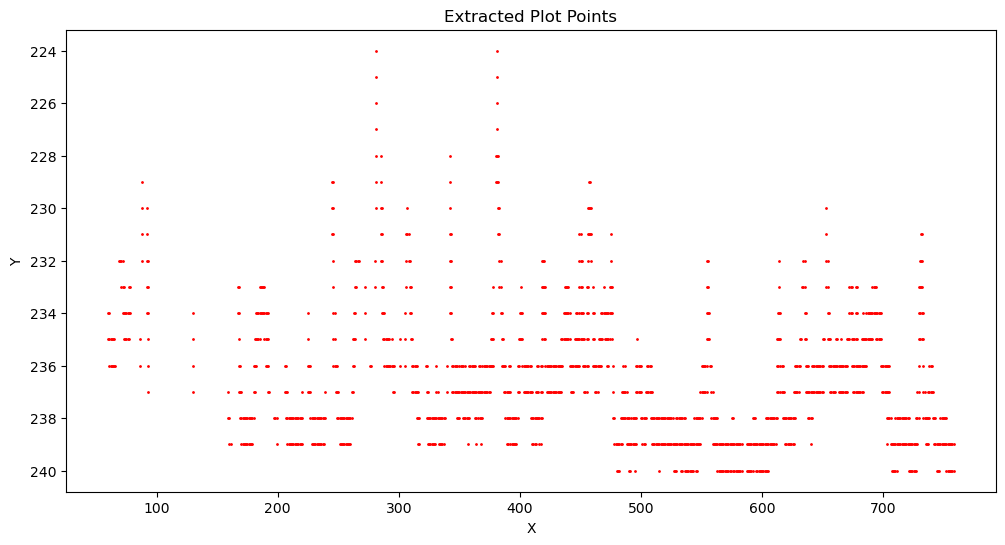

Color 1: R, G, B = (255, 255, 255), Count = 154110
Color 2: R, G, B = (0, 255, 255), Count = 7549
Color 3: R, G, B = (0, 255, 0), Count = 3703
Color 4: R, G, B = (0, 0, 0), Count = 3206
Color 5: R, G, B = (0, 0, 255), Count = 2615
Color 6: R, G, B = (255, 0, 0), Count = 1031
Color 7: R, G, B = (252, 252, 252), Count = 745
Color 8: R, G, B = (48, 48, 48), Count = 715
Color 9: R, G, B = (28, 28, 28), Count = 710
Color 10: R, G, B = (54, 54, 54), Count = 708
Color 11: R, G, B = (26, 26, 26), Count = 556
Color 12: R, G, B = (1, 255, 255), Count = 310
Color 13: R, G, B = (2, 255, 255), Count = 253
Color 14: R, G, B = (245, 245, 245), Count = 235
Color 15: R, G, B = (19, 19, 19), Count = 233


2024-12-12 20:04:08,473 - my_logger - INFO - Color for plot O₃: {'R': 0, 'G': 255, 'B': 255}
2024-12-12 20:04:08,473 - my_logger - INFO - Color for plot O₃: {'R': 0, 'G': 255, 'B': 255}
2024-12-12 20:04:08,473 - my_logger - INFO - Color for plot O₃: {'R': 0, 'G': 255, 'B': 255}
2024-12-12 20:04:08,473 - my_logger - INFO - Color for plot O₃: {'R': 0, 'G': 255, 'B': 255}
2024-12-12 20:04:08,473 - my_logger - INFO - Color for plot O₃: {'R': 0, 'G': 255, 'B': 255}
2024-12-12 20:04:08,473 - my_logger - INFO - Color for plot O₃: {'R': 0, 'G': 255, 'B': 255}
2024-12-12 20:04:08,473 - my_logger - INFO - Color for plot O₃: {'R': 0, 'G': 255, 'B': 255}


The RGB value for the color that best matches the description "cyan" is from Color 2:  

```json
{
    "R": 0,
    "G": 255,
    "B": 255
}
```
Extracted points saved to output/plot_points/plot_01_croppedO₃_plot_points.csv


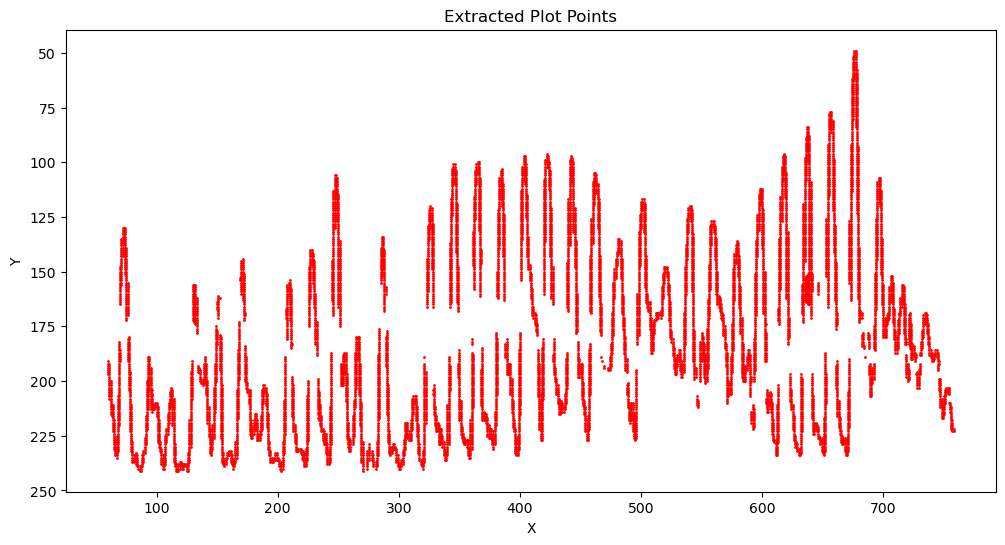

Color 1: R, G, B = (255, 255, 255), Count = 154110
Color 2: R, G, B = (0, 255, 255), Count = 7549
Color 3: R, G, B = (0, 255, 0), Count = 3703
Color 4: R, G, B = (0, 0, 0), Count = 3206
Color 5: R, G, B = (0, 0, 255), Count = 2615
Color 6: R, G, B = (255, 0, 0), Count = 1031
Color 7: R, G, B = (252, 252, 252), Count = 745
Color 8: R, G, B = (48, 48, 48), Count = 715
Color 9: R, G, B = (28, 28, 28), Count = 710
Color 10: R, G, B = (54, 54, 54), Count = 708
Color 11: R, G, B = (26, 26, 26), Count = 556
Color 12: R, G, B = (1, 255, 255), Count = 310
Color 13: R, G, B = (2, 255, 255), Count = 253
Color 14: R, G, B = (245, 245, 245), Count = 235
Color 15: R, G, B = (19, 19, 19), Count = 233


2024-12-12 20:04:10,882 - my_logger - INFO - Color for plot NO₂: {'R': 0, 'G': 0, 'B': 255}
2024-12-12 20:04:10,882 - my_logger - INFO - Color for plot NO₂: {'R': 0, 'G': 0, 'B': 255}
2024-12-12 20:04:10,882 - my_logger - INFO - Color for plot NO₂: {'R': 0, 'G': 0, 'B': 255}
2024-12-12 20:04:10,882 - my_logger - INFO - Color for plot NO₂: {'R': 0, 'G': 0, 'B': 255}
2024-12-12 20:04:10,882 - my_logger - INFO - Color for plot NO₂: {'R': 0, 'G': 0, 'B': 255}
2024-12-12 20:04:10,882 - my_logger - INFO - Color for plot NO₂: {'R': 0, 'G': 0, 'B': 255}
2024-12-12 20:04:10,882 - my_logger - INFO - Color for plot NO₂: {'R': 0, 'G': 0, 'B': 255}


The color that best matches the description "blue" is Color 5: R, G, B = (0, 0, 255). Here is the RGB value in the requested JSON format:

```json
{
    "R": 0,
    "G": 0,
    "B": 255
}
```
Extracted points saved to output/plot_points/plot_01_croppedNO₂_plot_points.csv


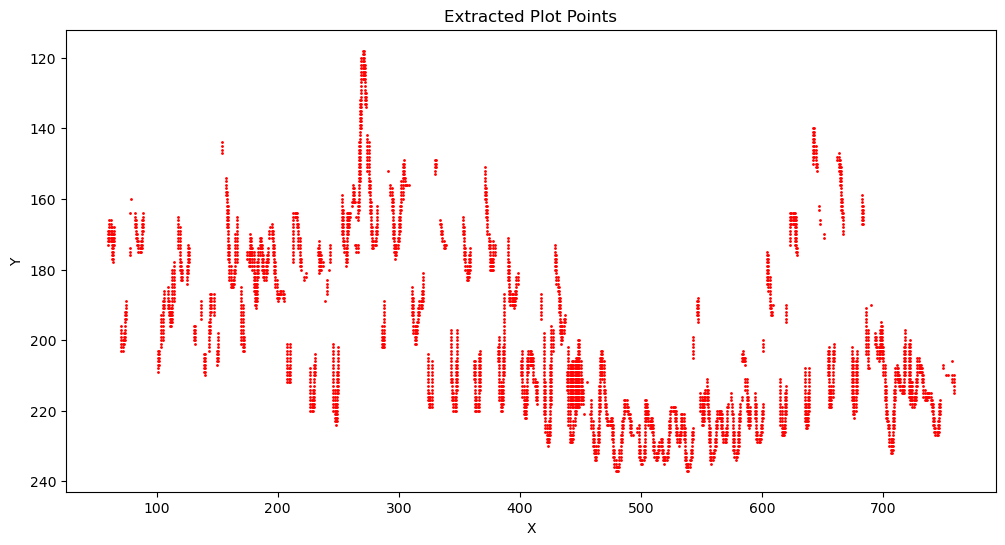

Color 1: R, G, B = (255, 255, 255), Count = 154110
Color 2: R, G, B = (0, 255, 255), Count = 7549
Color 3: R, G, B = (0, 255, 0), Count = 3703
Color 4: R, G, B = (0, 0, 0), Count = 3206
Color 5: R, G, B = (0, 0, 255), Count = 2615
Color 6: R, G, B = (255, 0, 0), Count = 1031
Color 7: R, G, B = (252, 252, 252), Count = 745
Color 8: R, G, B = (48, 48, 48), Count = 715
Color 9: R, G, B = (28, 28, 28), Count = 710
Color 10: R, G, B = (54, 54, 54), Count = 708
Color 11: R, G, B = (26, 26, 26), Count = 556
Color 12: R, G, B = (1, 255, 255), Count = 310
Color 13: R, G, B = (2, 255, 255), Count = 253
Color 14: R, G, B = (245, 245, 245), Count = 235
Color 15: R, G, B = (19, 19, 19), Count = 233


2024-12-12 20:04:15,945 - my_logger - INFO - Color for plot CO: {'R': 0, 'G': 255, 'B': 0}
2024-12-12 20:04:15,945 - my_logger - INFO - Color for plot CO: {'R': 0, 'G': 255, 'B': 0}
2024-12-12 20:04:15,945 - my_logger - INFO - Color for plot CO: {'R': 0, 'G': 255, 'B': 0}
2024-12-12 20:04:15,945 - my_logger - INFO - Color for plot CO: {'R': 0, 'G': 255, 'B': 0}
2024-12-12 20:04:15,945 - my_logger - INFO - Color for plot CO: {'R': 0, 'G': 255, 'B': 0}
2024-12-12 20:04:15,945 - my_logger - INFO - Color for plot CO: {'R': 0, 'G': 255, 'B': 0}
2024-12-12 20:04:15,945 - my_logger - INFO - Color for plot CO: {'R': 0, 'G': 255, 'B': 0}


The color that best matches the description "green" from the list is Color 3: R, G, B = (0, 255, 0). Here is the RGB value in the specified format:

```json
{
    "R": 0,
    "G": 255,
    "B": 0
}
```
Extracted points saved to output/plot_points/plot_01_croppedCO_plot_points.csv


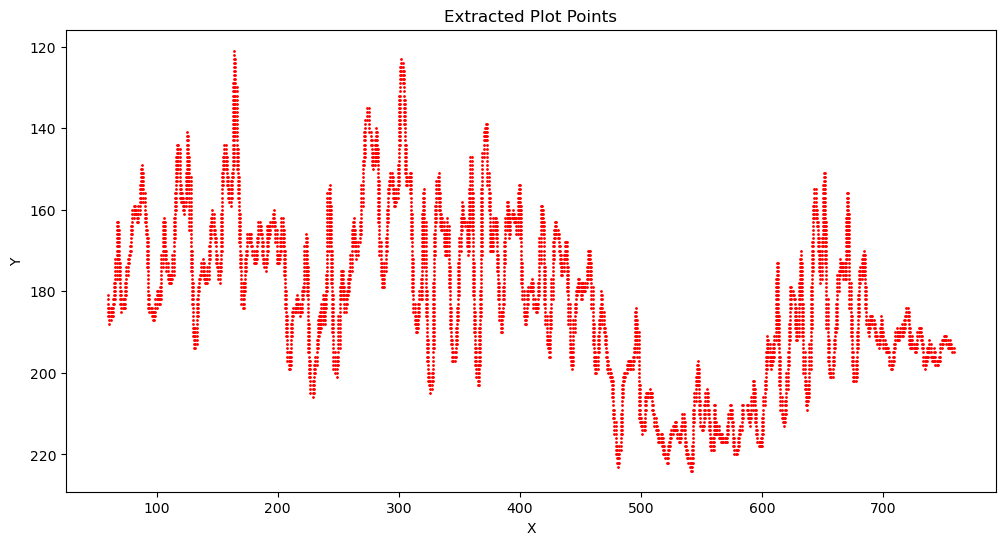

Bounding box coordinates saved to output/borderline/plot_02_cropped_bounding_box.csv


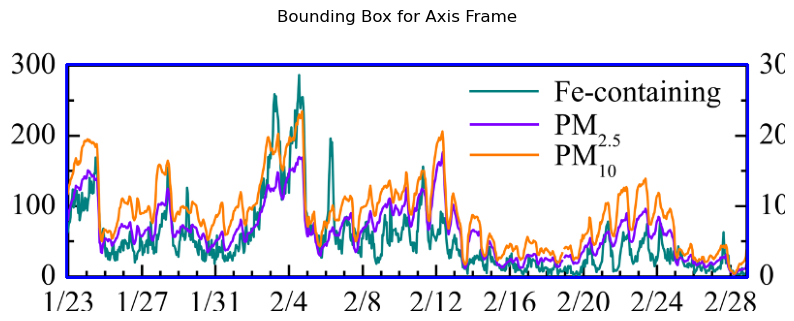

2024-12-12 20:04:16,193 - my_logger - INFO - Bounding box coordinates: (58, 35), (761, 255)
2024-12-12 20:04:16,193 - my_logger - INFO - Bounding box coordinates: (58, 35), (761, 255)
2024-12-12 20:04:16,193 - my_logger - INFO - Bounding box coordinates: (58, 35), (761, 255)
2024-12-12 20:04:16,193 - my_logger - INFO - Bounding box coordinates: (58, 35), (761, 255)
2024-12-12 20:04:16,193 - my_logger - INFO - Bounding box coordinates: (58, 35), (761, 255)
2024-12-12 20:04:16,193 - my_logger - INFO - Bounding box coordinates: (58, 35), (761, 255)
2024-12-12 20:04:16,193 - my_logger - INFO - Bounding box coordinates: (58, 35), (761, 255)


Color 1: R, G, B = (255, 255, 255), Count = 187309
Color 2: R, G, B = (0, 0, 0), Count = 4594
Color 3: R, G, B = (0, 128, 128), Count = 1940
Color 4: R, G, B = (255, 128, 0), Count = 954
Color 5: R, G, B = (250, 250, 250), Count = 777
Color 6: R, G, B = (17, 17, 17), Count = 730
Color 7: R, G, B = (39, 39, 39), Count = 724
Color 8: R, G, B = (44, 44, 44), Count = 711
Color 9: R, G, B = (56, 56, 56), Count = 520
Color 10: R, G, B = (0, 127, 127), Count = 512
Color 11: R, G, B = (128, 0, 255), Count = 474
Color 12: R, G, B = (255, 127, 0), Count = 387
Color 13: R, G, B = (255, 126, 0), Count = 328
Color 14: R, G, B = (255, 123, 0), Count = 307
Color 15: R, G, B = (0, 126, 126), Count = 303


2024-12-12 20:04:18,040 - my_logger - INFO - Color for plot Fe-containing: {'R': 0, 'G': 128, 'B': 128}
2024-12-12 20:04:18,040 - my_logger - INFO - Color for plot Fe-containing: {'R': 0, 'G': 128, 'B': 128}
2024-12-12 20:04:18,040 - my_logger - INFO - Color for plot Fe-containing: {'R': 0, 'G': 128, 'B': 128}
2024-12-12 20:04:18,040 - my_logger - INFO - Color for plot Fe-containing: {'R': 0, 'G': 128, 'B': 128}
2024-12-12 20:04:18,040 - my_logger - INFO - Color for plot Fe-containing: {'R': 0, 'G': 128, 'B': 128}
2024-12-12 20:04:18,040 - my_logger - INFO - Color for plot Fe-containing: {'R': 0, 'G': 128, 'B': 128}
2024-12-12 20:04:18,040 - my_logger - INFO - Color for plot Fe-containing: {'R': 0, 'G': 128, 'B': 128}


The color that best matches the description "teal" from the list is Color 3 with the RGB value of (0, 128, 128). Here is the JSON format:

```json
{
    "R": 0,
    "G": 128,
    "B": 128
}
```
Extracted points saved to output/plot_points/plot_02_croppedFe-containing_plot_points.csv


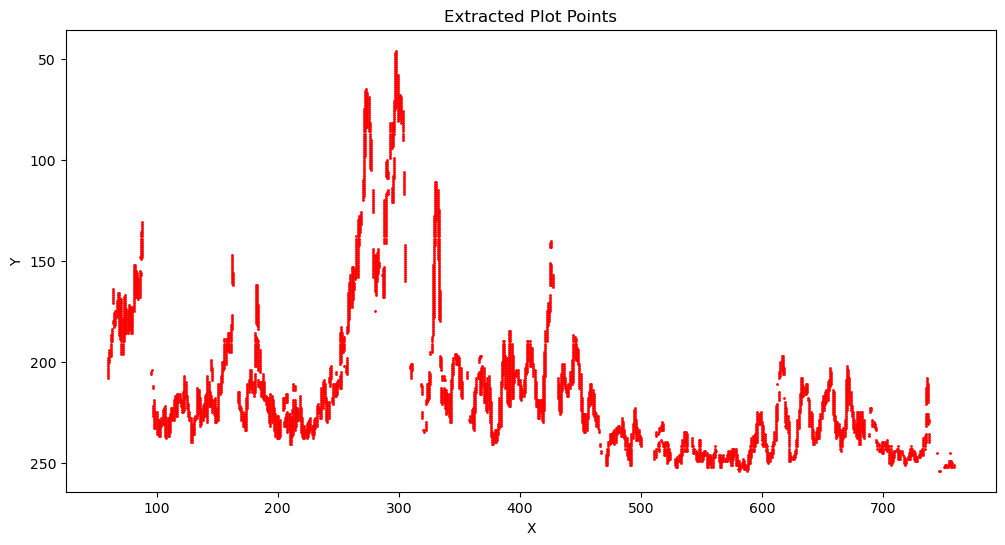

Color 1: R, G, B = (255, 255, 255), Count = 187309
Color 2: R, G, B = (0, 0, 0), Count = 4594
Color 3: R, G, B = (0, 128, 128), Count = 1940
Color 4: R, G, B = (255, 128, 0), Count = 954
Color 5: R, G, B = (250, 250, 250), Count = 777
Color 6: R, G, B = (17, 17, 17), Count = 730
Color 7: R, G, B = (39, 39, 39), Count = 724
Color 8: R, G, B = (44, 44, 44), Count = 711
Color 9: R, G, B = (56, 56, 56), Count = 520
Color 10: R, G, B = (0, 127, 127), Count = 512
Color 11: R, G, B = (128, 0, 255), Count = 474
Color 12: R, G, B = (255, 127, 0), Count = 387
Color 13: R, G, B = (255, 126, 0), Count = 328
Color 14: R, G, B = (255, 123, 0), Count = 307
Color 15: R, G, B = (0, 126, 126), Count = 303


2024-12-12 20:04:20,084 - my_logger - INFO - Color for plot PM₂.₅: {'R': 128, 'G': 0, 'B': 255}
2024-12-12 20:04:20,084 - my_logger - INFO - Color for plot PM₂.₅: {'R': 128, 'G': 0, 'B': 255}
2024-12-12 20:04:20,084 - my_logger - INFO - Color for plot PM₂.₅: {'R': 128, 'G': 0, 'B': 255}
2024-12-12 20:04:20,084 - my_logger - INFO - Color for plot PM₂.₅: {'R': 128, 'G': 0, 'B': 255}
2024-12-12 20:04:20,084 - my_logger - INFO - Color for plot PM₂.₅: {'R': 128, 'G': 0, 'B': 255}
2024-12-12 20:04:20,084 - my_logger - INFO - Color for plot PM₂.₅: {'R': 128, 'G': 0, 'B': 255}
2024-12-12 20:04:20,084 - my_logger - INFO - Color for plot PM₂.₅: {'R': 128, 'G': 0, 'B': 255}


The color that best matches the description "purple" is Color 11 with the RGB value (128, 0, 255). Here it is in the specified format:

```json
{
    "R": 128,
    "G": 0,
    "B": 255
}
```
Extracted points saved to output/plot_points/plot_02_croppedPM₂.₅_plot_points.csv


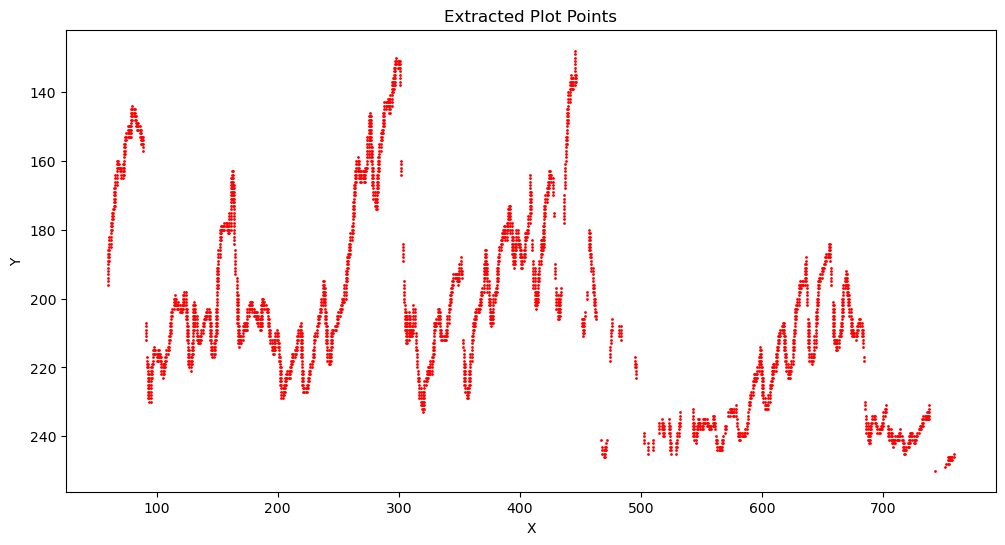

Color 1: R, G, B = (255, 255, 255), Count = 187309
Color 2: R, G, B = (0, 0, 0), Count = 4594
Color 3: R, G, B = (0, 128, 128), Count = 1940
Color 4: R, G, B = (255, 128, 0), Count = 954
Color 5: R, G, B = (250, 250, 250), Count = 777
Color 6: R, G, B = (17, 17, 17), Count = 730
Color 7: R, G, B = (39, 39, 39), Count = 724
Color 8: R, G, B = (44, 44, 44), Count = 711
Color 9: R, G, B = (56, 56, 56), Count = 520
Color 10: R, G, B = (0, 127, 127), Count = 512
Color 11: R, G, B = (128, 0, 255), Count = 474
Color 12: R, G, B = (255, 127, 0), Count = 387
Color 13: R, G, B = (255, 126, 0), Count = 328
Color 14: R, G, B = (255, 123, 0), Count = 307
Color 15: R, G, B = (0, 126, 126), Count = 303


2024-12-12 20:04:22,188 - my_logger - INFO - Color for plot PM₁₀: {'R': 255, 'G': 127, 'B': 0}
2024-12-12 20:04:22,188 - my_logger - INFO - Color for plot PM₁₀: {'R': 255, 'G': 127, 'B': 0}
2024-12-12 20:04:22,188 - my_logger - INFO - Color for plot PM₁₀: {'R': 255, 'G': 127, 'B': 0}
2024-12-12 20:04:22,188 - my_logger - INFO - Color for plot PM₁₀: {'R': 255, 'G': 127, 'B': 0}
2024-12-12 20:04:22,188 - my_logger - INFO - Color for plot PM₁₀: {'R': 255, 'G': 127, 'B': 0}
2024-12-12 20:04:22,188 - my_logger - INFO - Color for plot PM₁₀: {'R': 255, 'G': 127, 'B': 0}
2024-12-12 20:04:22,188 - my_logger - INFO - Color for plot PM₁₀: {'R': 255, 'G': 127, 'B': 0}


The color that best matches the description "orange" is Color 12 with the RGB values (255, 127, 0). Here is the JSON representation:

```json
{
    "R": 255,
    "G": 127,
    "B": 0
}
```
Extracted points saved to output/plot_points/plot_02_croppedPM₁₀_plot_points.csv


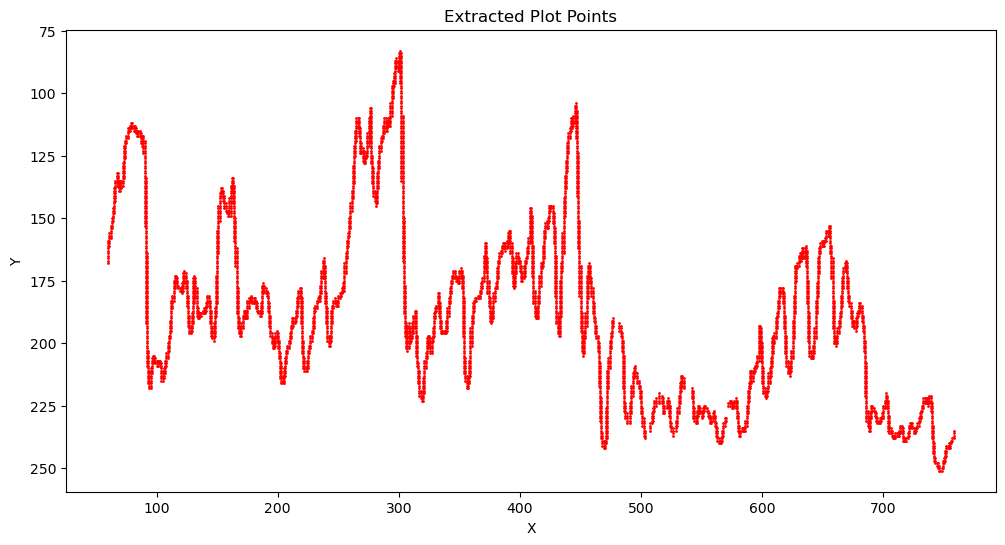

In [ ]:
import os
crop_image_list = []
for box in box_list:
    cropped_image = crop_image(
        IMAGE_PATH,
        box["top_left"],
        box["bottom_right"],
        CROP_OUTPUT_DIR,
        CROP_OUTPUT_SUFFIX.format(box["chart_id"]),
    )
    crop_image_list.append(cropped_image)
logger.info("Cropped images: %s", crop_image_list)
for crop_image_path, box_info in zip(crop_image_list, box_info_list):
    top_left, bottom_right = detect_axis_bounding_box(
        crop_image_path, "output/borderline", "_bounding_box", DEBUG
    )
    logger.info("Bounding box coordinates: %s, %s", top_left, bottom_right)
    all_merge_pd = pd.DataFrame()
    for plot in box_info["plots"]:
        color_name = plot["color"]
        plot_name = plot["name"]
        color = get_color(client, crop_image_path, plot["color"])
        logger.info("Color for plot %s: %s", plot["name"], color)
        return_array = extract_and_save_plot_points(
            crop_image_path,
            target_color=(color["R"], color["G"], color["B"]),
            output_dir="output/plot_points",
            output_suffix=f"{plot_name}_plot_points",
            debug=DEBUG,
        )
        # linear transform y coordinates
        # transform the bottom of the bounding box to min value of box info y
        # transform the top of the bounding box to max value of box info y
        y_axis_min_pixel = bottom_right[1]
        y_axis_max_pixel = top_left[1]
        y_axis_max_info = box_info["y_axis_max"]
        y_axis_min_info = box_info["y_axis_min"]
        y_axis_range = y_axis_max_info - y_axis_min_info
        y_axis_pixel_range = y_axis_max_pixel - y_axis_min_pixel
        return_array[:, 1] = y_axis_min_info + (
            (return_array[:, 1] - y_axis_min_pixel) / y_axis_pixel_range
        ) * y_axis_range
        # convert the return array into a panda dataframe
        # return array is a 2D array with x and y coordinates
        # create a dataframe with columns x and y
        result_pd = pd.DataFrame(return_array, columns=["x", plot_name])
        result_pd.to_csv(
            f"output/plot_points/{os.path.basename(crop_image_path).split('.')[0]}-{plot_name}_plot_points.csv", index=False
        )
        # merge the dataframes on x
        if all_merge_pd.empty:
            all_merge_pd = result_pd
        else:
            all_merge_pd = pd.merge(
                all_merge_pd, result_pd, on="x", how="outer"
            )

        # show the pandas dataframe
        # not with logger
        print(all_merge_pd)

In [57]:
all_merge_pd

,x,Fe-containing,PM₂.₅,PM₁₀
0,60.0,70.909091,87.272727,124.772727
1,61.0,79.090909,94.772727,131.590909
2,62.0,85.909091,100.227273,135.681818
3,63.0,92.727273,105.681818,140.454545
4,64.0,115.772727,108.409091,145.227273
...,...,...,...,...
686,754.0,6.818182,10.909091,19.090909
687,755.0,8.522727,11.590909,19.090909
688,756.0,6.136364,11.590909,21.136364
689,757.0,5.454545,11.590909,22.500000
